In [1]:
import matplotlib.pyplot as plt
import matplotlib.figure
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

master_mouse_path = os.path.join("data", "mouse_drug_data.csv")
master_clinical_path = os.path.join("data", "clinicaltrial_data.csv")

master_mouse_df = pd.read_csv(master_mouse_path)
master_clinical_df = pd.read_csv(master_clinical_path)

master_df= master_mouse_df.merge(master_clinical_df, right_on= "Mouse ID", left_on = "Mouse ID", how= "outer")



In [2]:
master_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [3]:
tumor_df = pd.pivot_table(master_df, values = "Tumor Volume (mm3)", index = ["Timepoint"], columns = ["Drug"])
tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [4]:
tumor_sem_df = master_df.groupby(["Drug", "Timepoint"]).sem().drop(columns = ["Metastatic Sites", "Mouse ID"])
tumor_sem_df_final = tumor_sem_df.pivot_table(values= "Tumor Volume (mm3)", index = ["Timepoint"], columns = ["Drug"])
tumor_sem_df_final

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


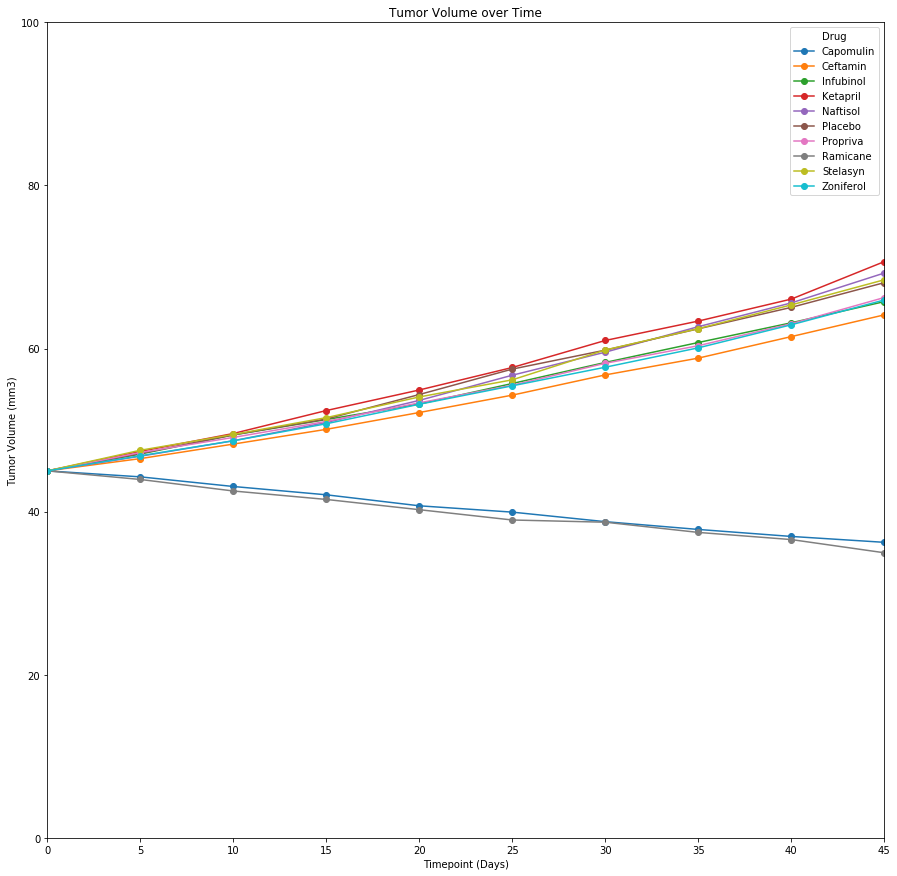

In [17]:
tumor_df.plot(marker = "o")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim([0,100])
plt.title ("Tumor Volume over Time")
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

## Metastatic Response to Treatment

In [6]:
meta_df = pd.pivot_table(master_df, values = "Metastatic Sites", index = ["Timepoint"], columns = ["Drug"])
meta_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [7]:
meta_sem_df = master_df.groupby(["Drug", "Timepoint"]).sem().drop(columns = ["Tumor Volume (mm3)", "Mouse ID"])
meta_sem_df_final = meta_sem_df.pivot_table(values= "Metastatic Sites", index = ["Timepoint"], columns = ["Drug"])
meta_sem_df_final

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


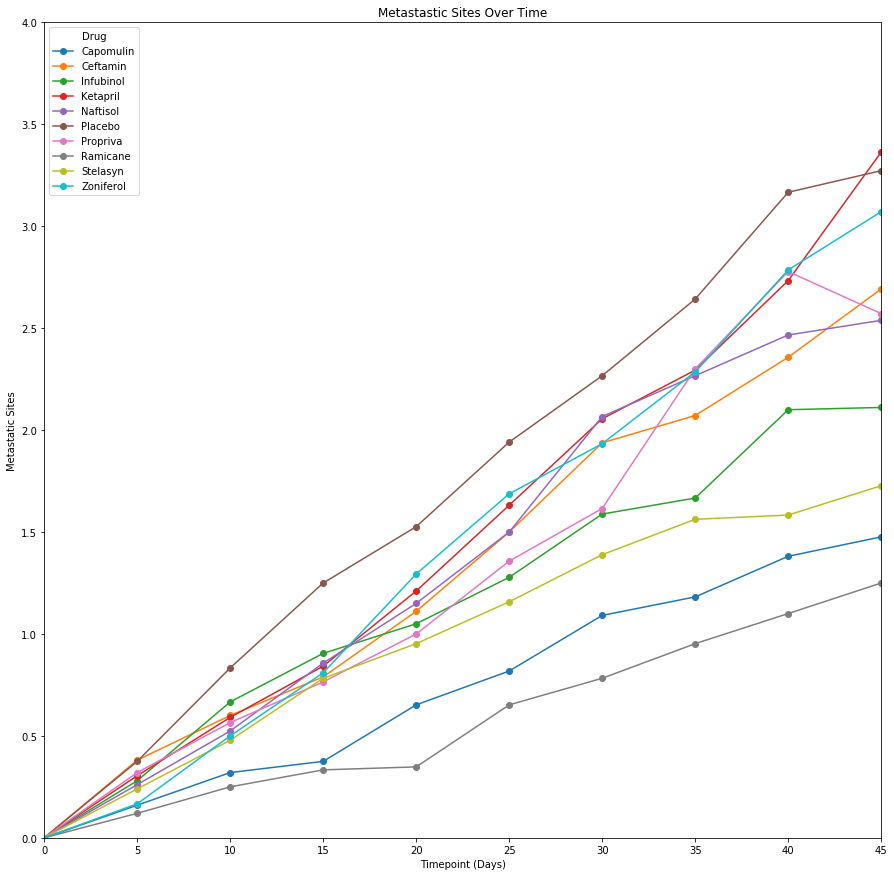

In [8]:
meta_df.plot(marker = "o")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Metastatic Sites")
plt.title ("Metastastic Sites Over Time")
plt.ylim([0,4])
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

## Survival Rates

In [9]:
survival_df = master_df.groupby(["Drug", "Timepoint"]).count().drop(columns = ["Metastatic Sites", "Tumor Volume (mm3)"])
survival_df_final = survival_df.pivot_table(values= "Mouse ID", index = ["Timepoint"], columns = ["Drug"])

### Raw Numbers

In [10]:
survival_df_final

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


### By Percentage

In [11]:
pct_survival = round((((survival_df_final) / (survival_df_final.iloc[0]))*100), 2)

In [12]:
pct_survival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


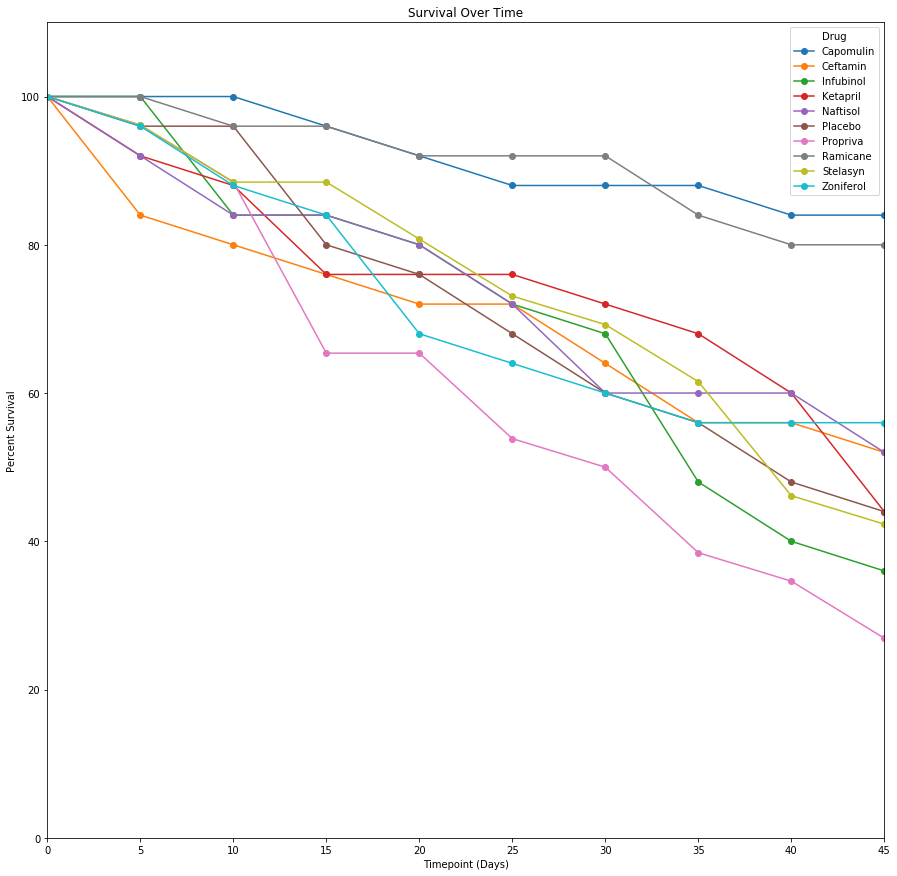

In [13]:
pct_survival.plot(marker = "o")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Percent Survival")
plt.title ("Survival Over Time")
plt.ylim([0,110])
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

## Summary Bar Graph

In [67]:
pct_change = round((((tumor_df.iloc[9])/(tumor_df.iloc[0]))*100)-100,2)

[-19.48, 42.52, 46.12, 57.03, 53.92, 51.3, 47.24, -22.32, 52.09, 46.58]

In [72]:
pct_change_df = pd.DataFrame(pct_change)
drug_list = pct_change_df.index.tolist()
pct_list = pct_change.tolist()

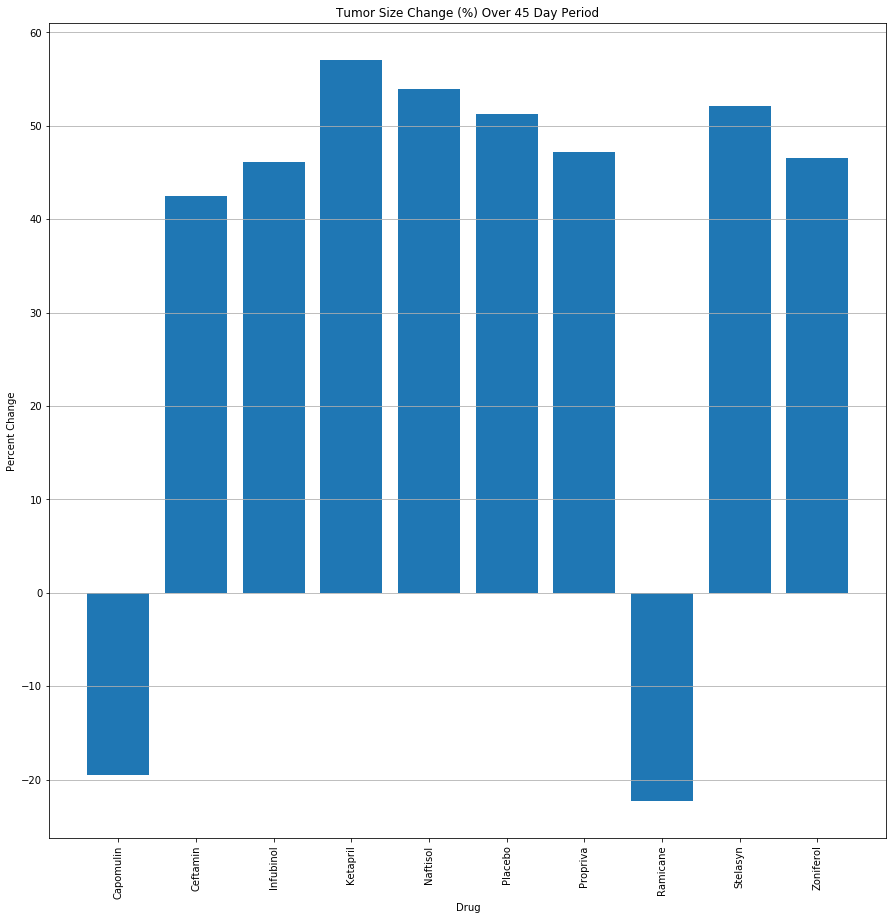

In [84]:
plt.bar(drug_list, pct_list)
plt.xlabel("Drug")
plt.ylabel("Percent Change")
plt.title("Tumor Size Change (%) Over 45 Day Period")
plt.xticks(rotation = 90)
plt.grid(axis = "y")
plt.show()

In [16]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)